In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import csv

2024-04-21 20:20:23.513481: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 20:20:23.532861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 20:20:23.532879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 20:20:23.533414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 20:20:23.536675: I tensorflow/core/platform/cpu_feature_guar

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.15.0'

In [4]:
def load_expanded_data(filename):
    l = []
    with open("../datasets/%s.csv" % (filename), "rt") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row: continue
            id = [row[0]]
            values = [float(x) for x in row[1:]]
            id.extend(values)
            l.append(id)
    return l

In [5]:
def sort_samples_by_link(data):
    sorted_data = {}
    for record in data:
        if record[0] in sorted_data.keys():
            sorted_data[record[0]].append(record[1:])
        else: sorted_data[record[0]] = [record[1:]]
    return sorted_data

In [ ]:
ExpandedDataLoaded1 = sort_samples_by_link(load_expanded_data("expanded_data1"))

In [ ]:
ExpandedDataLoaded2 = sort_samples_by_link(load_expanded_data("expanded_data2"))

In [ ]:
ExpandedDataLoaded3 = sort_samples_by_link(load_expanded_data("expanded_data3"))

In [ ]:
def normalize(vector):
    scaler = preprocessing.MinMaxScaler()
    return scaler.fit_transform(vector)

In [ ]:
useData = np.array(ExpandedDataLoaded1['9377906285566510514'])

In [ ]:
useData

In [ ]:
useData[:, 68] = normalize(useData[:, 68].reshape(-1, 1)).reshape(1, -1)
useData[:, 71:] = normalize(useData[:, 71:])

In [ ]:
def create_inout_sequences(data, shape):
    x = np.zeros((data.shape[0]-shape[0], shape[0], shape[1]))
    y = np.zeros((data.shape[0]-shape[0], 1))
    for i in range(data.shape[0]-shape[0]):
        train_seq = data[i:i+shape[0]]
        train_lbl = data[i+shape[0]:i+shape[0]+1][0][-1]
        x[i] = train_seq
        y[i] = train_lbl
    return x, y

In [ ]:
x, y = create_inout_sequences(useData, [30, 75])

In [ ]:
x.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
model = Sequential()
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
model.add(LSTM(units=140, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, callbacks=earlystop, validation_split=0.2)

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
y_test.shape, y_hat.shape

In [ ]:
np.mean((y_test - y_hat) ** 2)

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y_test, y_hat, c='m', s=3)
ax.grid(True)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

## 01/02/2024


In [6]:
def load_expanded_data(filename):
    result = {}
    with open("../datasets/%s.csv" % filename, "rt") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row: continue
            key = row[0]
            values = [float(x) for x in row[1:]]
            result.setdefault(key, []).append(values)
    return result

In [7]:
def normalize(vector):
    scaler = preprocessing.MinMaxScaler()
    return scaler.fit_transform(vector)

In [8]:
def create_inout_sequences(data, shape):
    x = np.zeros((data.shape[0]-shape[0], shape[0], shape[1]))
    y = np.zeros((data.shape[0]-shape[0], 1))
    for i in range(data.shape[0]-shape[0]):
        train_seq = data[i:i+shape[0]]
        train_lbl = data[i+shape[0]:i+shape[0]+1][0][-1]
        x[i] = train_seq
        y[i] = train_lbl
    return x, y

In [9]:
ExpandedDataLoaded1 = load_expanded_data("expanded_data1")
useData = ExpandedDataLoaded1['9377906285566510514']
del ExpandedDataLoaded1

In [10]:
ExpandedDataLoaded2 = load_expanded_data("expanded_data2")
useData.extend(ExpandedDataLoaded2['9377906285566510514'])
del ExpandedDataLoaded2
ExpandedDataLoaded3 = load_expanded_data("expanded_data3")
useData.extend(ExpandedDataLoaded3['9377906285566510514'])
del ExpandedDataLoaded3

In [11]:
useData = np.array(useData)

In [12]:
useData.shape

(213522, 75)

In [13]:
useData[:, 68] = normalize(useData[:, 68].reshape(-1, 1)).reshape(1, -1)
useData[:, 71:] = normalize(useData[:, 71:])
x, y = create_inout_sequences(useData, [30, 75])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((192142, 30, 75), (192142, 1), (21350, 30, 75), (21350, 1))

### Model 1: 
**Inputs (30, 75) --> (1)**: previous 30 records to predict next travel time

**Include parameters**:

    year, month, weekday, day_of_month, hour_of_day, time_of_day, is_holiday, is_weekend, width, length, speed, travel_time

**random** train test split: 0.1, validation split: 0.2

**loss function**: MSE



In [18]:
model1 = Sequential()
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
model1.add(LSTM(units=140, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(Dense(units=1, activation='sigmoid'))
model1.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 140)               120960    
                                                                 
 dropout_2 (Dropout)         (None, 140)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 141       
                                                                 
Total params: 121101 (473.05 KB)
Trainable params: 121101 (473.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=100, callbacks=earlystop, validation_split=0.2)

Epoch 1/100
1538/1538 [==============================] - 4s 2ms/step - loss: 8.9563e-04 - val_loss: 3.1659e-04
Epoch 2/100
1538/1538 [==============================] - 3s 2ms/step - loss: 2.6304e-04 - val_loss: 2.1389e-04
Epoch 3/100
 189/1538 [==>...........................] - ETA: 2s - loss: 2.2976e-04

KeyboardInterrupt: 

In [ ]:
model1.evaluate(X_test, y_test)  # MSE

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
tf.keras.backend.clear_session()

### Model 2: 

In [ ]:
model2 = Sequential()
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
model2.add(LSTM(units=100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.2))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
model2.summary()

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=100, callbacks=earlystop, validation_split=0.2)

In [ ]:
model2.evaluate(X_test, y_test)

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
tf.keras.backend.clear_session()

### Model 3

In [ ]:
model3 = Sequential()
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
model3.add(LSTM(units=100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dropout(0.2))
model3.add(Dense(units=1, activation='elu'))
model3.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
model3.summary()

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=100, callbacks=earlystop, validation_split=0.2)

In [ ]:
model3.evaluate(X_test, y_test)

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
tf.keras.backend.clear_session()

### Model 4:

input shape: (num_of_records, num_of_links, num_of_features), in time sequence

features: year, month, is_weekday, is_holiday, is_rush_hour, (is_missing,) link_width, average_speed

In [ ]:
class STGCN(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(STGCN, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                    shape=[int(input_shape[-1]),
                                    self.num_outputs])

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

# 02/04/2024

In [1]:
from functions import *

In [2]:
links = getStaticLinkData()
adj_matrix, upstreams = getSpatialData()

In [3]:
np.sum(np.not_equal(upstreams, -1), axis=1)

array([1, 1, 0, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 0, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])

In [4]:
samples1 = getTemporalData("../datasets/gy_link_travel_time_part1.txt")
samples2 = getTemporalData("../datasets/gy_link_travel_time_part2.txt")
samples3 = getTemporalData("../datasets/gy_link_travel_time_part3.txt")
samples = tf.concat([samples1, samples2], 0)
samples = tf.concat([samples, samples3], 0)
del samples1, samples2, samples3

In [5]:
start_date_1 = datetime(2016, 3, 1)
end_date_1 = datetime(2016, 6, 1)
start_date_2 = datetime(2017, 3, 1)
end_date_2 = datetime(2017, 7, 1)

In [6]:
def _isWeekday(day : datetime) -> bool:
    if (day.weekday() == 4 or day.weekday() == 5):
        return True
    else: return False

def _isWorkday(day : datetime) -> bool:
    return is_workday(day)

def _isRushHour(time : int):
    morning = evening = False
    if time > 420 and time < 540: morning = True
    elif time > 1020 and time < 1140: evening = True
    return morning, evening

In [7]:
def _extractFeature(
        sample : np.ndarray, 
        ext_sample : np.ndarray, 
        day : datetime
    ) -> np.ndarray:

    ext_sample[:] = 0
    ext_sample[0] = day.year    # year 
    ext_sample[day.month] = 1   # month
    ext_sample[13] = _isWeekday(day)    # is_weekday
    ext_sample[14] = _isWorkday(day.date())     # is_workday
    ext_sample[15:17] = _isRushHour(sample[3])  # is_morning_rush && is_evening_rush
    ext_sample[-2] = 0      # is_missing = 0
    ext_sample[-1] = sample[-1]     # travel_time 
    
    return ext_sample

In [21]:
def _sortSequence(
        samples : np.ndarray, 
        length : int, 
        start_time : datetime, 
        extract=True
    ):

    if extract: 
        sorted_seq = np.full([length, FEATURE_COUNT], 0)
        sorted_seq[:, -2] = 1   # initialize is_missing = 1
    else: sorted_seq = np.full([length, samples.shape[1]], 0)

    for each in samples:
        current_time = datetime(int(each[0]), int(each[1]), int(each[2]))
        day = (current_time - start_time).days
        index = (day * 1440 + int(each[3]) - 1) // 2

        if index < length and index > 0:
            if extract:
                _extractFeature(each, sorted_seq[index], current_time)
            else: sorted_seq[index] = each
        else:
            continue

    return sorted_seq

In [22]:
def sortLinks(
        samples : tf.Tensor, 
        start_time : datetime, 
        end_time : datetime, 
        link_lens : tf.Tensor,
        extract=True
    ) -> tf.Tensor:

    length = (end_time - start_time).days * 24 * 30
    if extract: sorted_data = np.zeros([length, len(assigned_links), FEATURE_COUNT])
    else: sorted_data = np.zeros([length, len(assigned_links), samples.shape[-1]-1])

    for link in range(len(assigned_links)):
        indices = tf.where(samples[:, 0] == link)
        data = tf.gather_nd(samples, indices)[:, 1:]

        sortedSeq = _sortSequence(data.numpy(), length, start_time, extract)

        # avr_speed = link_length / travel_time 
        sorted_data[:, -1] = link_lens[link] / sorted_data[:, -1] 

        # sorted_data[:, link, :] = _normalize(sortedSeq)
        sorted_data[:, link, :] = sortedSeq

    return tf.convert_to_tensor(sorted_data, dtype=tf.float32)

In [23]:
sortedData1 = sortLinks(samples, start_date_1, end_date_1, links[:, 1])
sortedData2 = sortLinks(samples, start_date_2, end_date_2, links[:, 1])

In [24]:
sortedData1.shape[0] * sortedData1.shape[1] + sortedData2.shape[0] * sortedData2.shape[1]

20338560

In [25]:
np.sum(sortedData1[:, :, -2]) + np.sum(sortedData2[:, :, -2])

2841449.0

In [26]:
spac_data = adj_matrix
stat_data = tf.reshape(links[:, 2], (links.shape[0], 1))

In [27]:
temp_data1 = tf.concat([tf.broadcast_to(stat_data, [sortedData1.shape[0], sortedData1.shape[1], 1]), sortedData1], 2)
temp_data2 = tf.concat([tf.broadcast_to(stat_data, [sortedData2.shape[0], sortedData2.shape[1], 1]), sortedData2], 2)

In [28]:
def createInOutSeq(
        data : tf.Tensor, 
        in_length : int, 
        out_length : int, 
        test_size=7200
    ):
    '''
    data shape: [m + in_length + out_length, 18]
    in shape: [m, in_length, 18]
    out shape: [m, out_length, 1] -> [m, out_length]
    '''
    train = data[:-test_size]
    test = data[-test_size:]

    m = train.shape[0] - in_length - out_length
    train_x = np.zeros([m, in_length, train.shape[1]])
    train_y = np.zeros([m, out_length, ])

    for i in range(m):
        current = i+in_length
        train_x[i] = train[i:current]
        train_y[i] = train[current:current+out_length, -1]

    m = test.shape[0] - in_length - out_length
    test_x = np.zeros([m, in_length, test.shape[1]])
    test_y = np.zeros([m, out_length, ])

    for i in range(m):
        current = i+in_length
        test_x[i] = test[i:current]
        test_y[i] = test[current:current+out_length, -1]

    return (train_x, train_y), (test_x, test_y)

In [29]:
id = 22
train1, test1 = createInOutSeq(temp_data1[:, id, :], INPUT_LENGTH, PRIDICT_LENGTH)
train2, test2 = createInOutSeq(temp_data2[:, id, :], INPUT_LENGTH, PRIDICT_LENGTH)

X_train = tf.concat([train1[0], train2[0]], 0)
y_train = tf.concat([train1[1], train2[1]], 0)
X_test = tf.concat([test1[0], test2[0]], 0)
y_test = tf.concat([test1[1], test2[1]], 0)

In [17]:
def normalize(train : np.ndarray, test : np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    train_shape = train.shape
    test_shape = test.shape
    train = np.reshape(train, (-1, train_shape[-1]))
    test = np.reshape(test, (-1, test_shape[-1]))
    scaler = preprocessing.MinMaxScaler()
    return np.reshape(scaler.fit_transform(train), train_shape), np.reshape(scaler.transform(test), test_shape)

In [18]:
# X_train, X_test= normalize(X_train, X_test)

In [33]:
tf.reduce_sum(tf.cast(tf.equal(y_test, 0), dtype=tf.int32)).numpy() / (y_test.shape[0] * y_test.shape[1])

0.06491963661774983

In [34]:
tf.reduce_sum(tf.cast(tf.equal(y_train, 0), dtype=tf.int32)).numpy() / (y_train.shape[0] * y_train.shape[1])

0.10421376889461996

In [38]:
def scheduler(epoch, lr):
    if epoch < 10: return lr
    else: return lr * 0.9

lr_scheduler = callbacks.LearningRateScheduler(scheduler)
earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

In [39]:
import time

In [46]:
units = [10, 30, 50, 100, 150, 200, 500]
# units = [500, 1000, 2000, 5000, 10000]
# units = [100]
histories = []
time_taken = []
test_losses = []

for unit in units:
    model = models.Sequential()
    model.add(layers.LSTM(units=unit, return_sequences=False, input_shape=(INPUT_LENGTH, FEATURE_COUNT+1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=PRIDICT_LENGTH, activation='elu'))
    model.compile(optimizer='adam', loss=losses.MeanSquaredError())

    start_time = time.time()
    histories.append(model.fit(X_train, y_train, epochs=1000, batch_size=360, callbacks=[earlystop, lr_scheduler], validation_split=0.2))
    end_time = time.time()
    time_taken.append(end_time-start_time)

    test_losses.append(model.evaluate(X_test, y_test))

    tf.keras.backend.clear_session()

Epoch 1/1000
311/311 [==============================] - 1s 3ms/step - loss: 21.1893 - val_loss: 18.2231 - lr: 0.0010
Epoch 2/1000
311/311 [==============================] - 1s 2ms/step - loss: 17.5168 - val_loss: 14.8743 - lr: 0.0010
Epoch 3/1000
311/311 [==============================] - 1s 2ms/step - loss: 14.9817 - val_loss: 12.4030 - lr: 0.0010
Epoch 4/1000
311/311 [==============================] - 1s 2ms/step - loss: 13.1843 - val_loss: 10.6014 - lr: 0.0010
Epoch 5/1000
311/311 [==============================] - 1s 2ms/step - loss: 11.9485 - val_loss: 9.2947 - lr: 0.0010
Epoch 6/1000
311/311 [==============================] - 1s 2ms/step - loss: 11.1125 - val_loss: 8.3502 - lr: 0.0010
Epoch 7/1000
311/311 [==============================] - 1s 2ms/step - loss: 10.5306 - val_loss: 7.6653 - lr: 0.0010
Epoch 8/1000
311/311 [==============================] - 1s 2ms/step - loss: 10.1120 - val_loss: 7.1412 - lr: 0.0010
Epoch 9/1000
311/311 [==============================] - 1s 2ms/step 

In [24]:
for i, each in enumerate(histories):
    time_taken[i] /= len(each.history['loss'])

Text(0, 0.5, 'Average time taken of each epoch (s)')

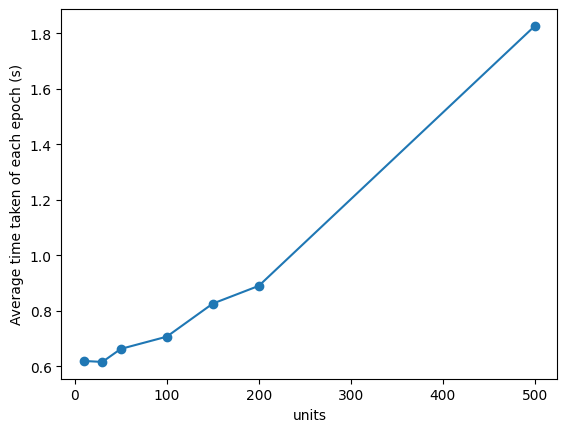

In [25]:
plt.plot(units, time_taken, marker='o')
plt.xlabel('units')
plt.ylabel('Average time taken of each epoch (s)')

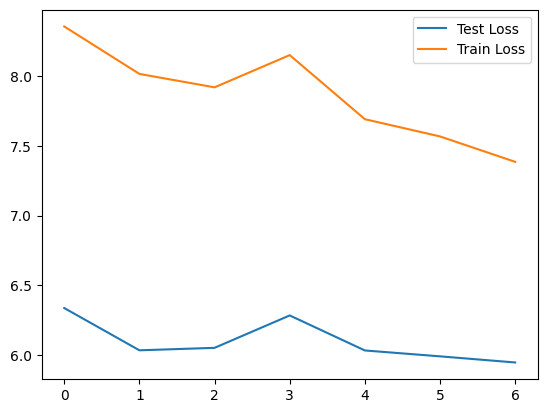

In [26]:
train_losses = []
for i, each in enumerate(histories):
    train_losses.append(each.history['loss'][-1])

plt.plot(test_losses, label='Test Loss')
plt.plot(train_losses, label='Train Loss')
plt.legend()

In [ ]:
dropouts = [0.1, 0.2, 0.5, 0.8]
histories2 = []

for dropout in dropouts:
    model = models.Sequential()
    model.add(layers.LSTM(units=100, return_sequences=False, input_shape=(INPUT_LENGTH, FEATURE_COUNT+1)))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(units=PRIDICT_LENGTH, activation='elu'))
    model.compile(optimizer='adam', loss=losses.MeanSquaredError())

    histories2.append(model.fit(X_train, y_train, epochs=1000, batch_size=360, callbacks=earlystop, validation_split=0.2))

    tf.keras.backend.clear_session()

In [ ]:
b_sizes = [10, 30, 120, 360, 720, 1440]

earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
histories3 = []
time_taken = []

for b_size in b_sizes:
    model = models.Sequential()
    model.add(layers.LSTM(units=100, return_sequences=False, input_shape=(INPUT_LENGTH, FEATURE_COUNT+1)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=PRIDICT_LENGTH, activation='elu'))
    model.compile(optimizer='adam', loss=losses.MeanSquaredError())

    start_time = time.time()
    histories3.append(model.fit(X_train, y_train, epochs=1000, batch_size=b_size, callbacks=[earlystop, lr_scheduler], validation_split=0.2))
    end_time = time.time()
    time_taken.append(end_time-start_time)

    tf.keras.backend.clear_session()

In [ ]:
for i, each in enumerate(histories3):
    time_taken[i] /= len(each.history['loss'])

In [ ]:
plt.plot(b_sizes, time_taken, marker='o')
plt.xlabel('batch_size')
plt.ylabel('Average time taken of each epoch (s)')

In [34]:
X_train.shape, y_train.shape

(TensorShape([139618, 30, 20]), TensorShape([139618, 1]))

In [ ]:
model = models.Sequential()
model.add(layers.LSTM(units=100, return_sequences=True, input_shape=(INPUT_LENGTH, FEATURE_COUNT+1)))
model.add(layers.LSTM(units=100, return_sequences=True, input_shape=(INPUT_LENGTH, 100)))
model.add(layers.LSTM(units=100, return_sequences=False, input_shape=(INPUT_LENGTH, 100)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=PRIDICT_LENGTH, activation='elu'))
model.compile(optimizer='adam', loss=losses.MeanSquaredError())

history = model.fit(X_train, y_train, epochs=1000, batch_size=360, callbacks=[earlystop, lr_scheduler], validation_split=0.2)

tf.keras.backend.clear_session()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(histories3[3].history['loss'])

In [ ]:
# model.evaluate(X_test, y_test)  # MSE

In [47]:
import matplotlib.pyplot as plt 

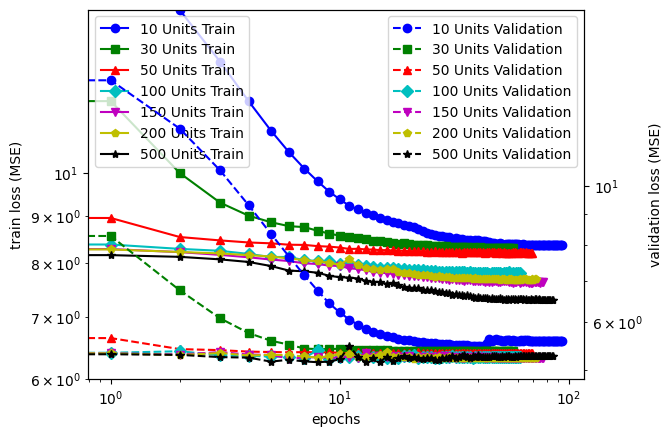

In [50]:
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', '^', 'D', 'v', 'p', '*']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for i in range(len(histories)):
    ax1.plot(histories[i].history['loss'], linestyle="-", color=colors[i], marker=markers[i], label=f'{units[i]} Units Train')
    ax2.plot(histories[i].history['val_loss'], linestyle="--", color=colors[i], marker=markers[i], label=f'{units[i]} Units Validation')
# plt.title('model 1 loss')
ax1.set_ylabel('train loss (MSE)')
ax2.set_ylabel('validation loss (MSE)')
ax1.set_xlabel('epochs')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(6, 15)
#ax2.set_ylim(10.5, 14)
ax1.set_xscale('log')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', '^', 'D', 'v', 'p', '*']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for i in range(len(histories2)):
    ax1.plot(histories2[i].history['loss'], linestyle="-", color=colors[i], marker=markers[i], label=f'{dropouts[i]} Dropout Train')
    ax2.plot(histories2[i].history['val_loss'], linestyle="--", color=colors[i], marker=markers[i], label=f'{dropouts[i]} Dropout Validation')
# plt.title('model 1 loss')
ax1.set_ylabel('train loss (MSE)')
ax2.set_ylabel('validation loss (MSE)')
ax1.set_xlabel('epochs')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(4, 9)
ax2.set_ylim(5, 8)
ax1.set_xscale('log')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.show()

In [ ]:
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', '^', 'D', 'v', 'p', '*']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for i in range(len(histories3)):
    ax1.plot(histories3[i].history['loss'], linestyle="-", color=colors[i], marker=markers[i], label=f'B = {b_sizes[i]} Train')
    ax2.plot(histories3[i].history['val_loss'], linestyle="--", color=colors[i], marker=markers[i], label=f'B = {b_sizes[i]} Validation')
# plt.title('model 1 loss')
ax1.set_ylabel('train loss (MSE)')
ax2.set_ylabel('validation loss (MSE)')
ax1.set_xlabel('epochs')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(6.75, 10)
#ax2.set_ylim(5.25, 6.5)
ax1.set_xscale('log')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [40]:
tf.keras.backend.clear_session()

In [63]:
upstream_speed1 = np.full((sortedData1.shape[0], sortedData1.shape[1], 4), -1)
for i, link in enumerate(upstreams):
    for j, l in enumerate(link):
        if l == -1: continue
        else:
            upstream_speed1[1:, i, j] = sortedData1[:-1, l, -1]
upstream_speed2 = np.full((sortedData2.shape[0], sortedData2.shape[1], 4), -1)
for i, link in enumerate(upstreams):
    for j, l in enumerate(link):
        if l == -1: continue
        else:
            upstream_speed2[1:, i, j] = sortedData2[:-1, l, -1]

In [64]:
temp_data1 = tf.concat([upstream_speed1, temp_data1], 2)
temp_data2 = tf.concat([upstream_speed2, temp_data2], 2)

In [65]:
id = 22
train1, test1 = createInOutSeq(temp_data1[:, id, :], INPUT_LENGTH, PRIDICT_LENGTH)
train2, test2 = createInOutSeq(temp_data2[:, id, :], INPUT_LENGTH, PRIDICT_LENGTH)

X_train = tf.concat([train1[0], train2[0]], 0)
y_train = tf.concat([train1[1], train2[1]], 0)
X_test = tf.concat([test1[0], test2[0]], 0)
y_test = tf.concat([test1[1], test2[1]], 0)

In [66]:
X_train, X_test= normalize(X_train, X_test)

In [67]:
model = models.Sequential()
earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
model.add(layers.LSTM(units=150, return_sequences=False, input_shape=(INPUT_LENGTH, FEATURE_COUNT+5)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=PRIDICT_LENGTH, activation='elu'))
model.compile(optimizer='adam', loss=losses.MeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               105000    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 15)                2265      
                                                                 
Total params: 107265 (419.00 KB)
Trainable params: 107265 (419.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=360, callbacks=[earlystop, lr_scheduler], validation_split=0.2)

Epoch 1/1000
311/311 [==============================] - 2s 3ms/step - loss: 8.8079 - val_loss: 5.3383 - lr: 0.0010
Epoch 2/1000
311/311 [==============================] - 1s 3ms/step - loss: 7.9890 - val_loss: 5.1288 - lr: 0.0010
Epoch 3/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.8436 - val_loss: 5.0617 - lr: 0.0010
Epoch 4/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.6918 - val_loss: 5.0694 - lr: 0.0010
Epoch 5/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.5865 - val_loss: 5.1199 - lr: 0.0010
Epoch 6/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.4599 - val_loss: 5.1089 - lr: 0.0010
Epoch 7/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.3775 - val_loss: 5.2017 - lr: 0.0010
Epoch 8/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.3193 - val_loss: 5.0219 - lr: 0.0010
Epoch 9/1000
311/311 [==============================] - 1s 2ms/step - loss: 7.26

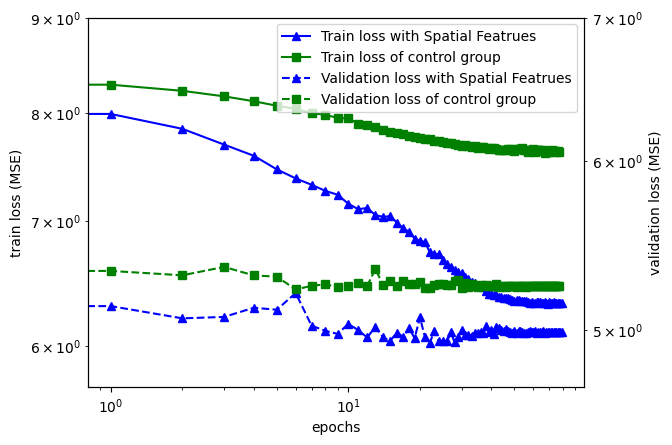

In [79]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(history.history['loss'], linestyle="-", color=colors[0], marker=markers[2], label="Train loss with Spatial Featrues")
ax2.plot(history.history['val_loss'], linestyle="--", color=colors[0], marker=markers[2], label="Validation loss with Spatial Featrues")
ax1.plot(histories[4].history['loss'], linestyle="-", color=colors[1], marker=markers[1], label="Train loss of control group")
ax2.plot(histories[4].history['val_loss'], linestyle="--", color=colors[1], marker=markers[1], label="Validation loss of control group")
# plt.title('model 1 loss')
ax1.set_ylabel('train loss (MSE)')
ax2.set_ylabel('validation loss (MSE)')
ax1.set_xlabel('epochs')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim(5.7, 9)
ax2.set_ylim(4.7, 7)
ax1.set_xscale('log')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [78]:
histories[4].history['loss'][-1] / history.history['loss'][-1]

1.2050584195298497

## =====================================================

In [37]:
from functions import *

In [38]:
links = getStaticLinkData()
adj_matrix, upstreams = getSpatialData()

In [39]:
samples1 = getTemporalData("../datasets/gy_link_travel_time_part1.txt")
samples2 = getTemporalData("../datasets/gy_link_travel_time_part2.txt")
samples3 = getTemporalData("../datasets/gy_link_travel_time_part3.txt")
samples = tf.concat([samples1, samples2], 0)
samples = tf.concat([samples, samples3], 0)
del samples1, samples2, samples3

In [40]:
start_date_1 = datetime(2016, 3, 1)
end_date_1 = datetime(2016, 6, 1)
start_date_2 = datetime(2017, 3, 1)
end_date_2 = datetime(2017, 7, 1)

In [41]:
sortedData1 = sortLinks(samples, start_date_1, end_date_1, links[:, 1])
sortedData2 = sortLinks(samples, start_date_2, end_date_2, links[:, 1])

In [6]:
spac_data = adj_matrix
stat_data = tf.reshape(links[:, 2], (links.shape[0], 1))

In [68]:
temp_train = tf.concat([sortedData1[:-VALIDATION_LEN-TEST_LEN], sortedData2[:-VALIDATION_LEN-TEST_LEN]], 0)
temp_valid = tf.concat([sortedData1[-VALIDATION_LEN-TEST_LEN:-TEST_LEN], sortedData2[-VALIDATION_LEN-TEST_LEN:-TEST_LEN]], 0)
temp_test = tf.concat([sortedData1[-TEST_LEN:], sortedData2[-TEST_LEN:]], 0)

In [8]:
def generateSTLSTMSeq(
        data : tf.Tensor, 
        in_length : int, 
        out_length : int, 
        spac_data : tf.Tensor,
        stat_data : tf.Tensor,
        batch_size : int):
    '''
    data shape: [in_length + n + out_length, 132, 18]
    in (x) shape: [n, in_length, 132, 18]
    out (y) shape: [n, out_length, 132, 1] -> [n, out_length, 132]
    '''
    n = data.shape[0] - in_length - out_length
    while True:
        for i in range(0, n, batch_size):
            x_batch = np.zeros((batch_size, in_length, data.shape[1], data.shape[2]))
            y_batch = np.zeros((batch_size, out_length, data.shape[1]))
            for j in range(min(batch_size, n - i)):
                current = i + j
                x_batch[j] = data[current:current+in_length]
                y_batch[j] = data[current+in_length:current+in_length+out_length, :, -1]
            yield ((
                x_batch, 
                tf.broadcast_to(spac_data, [batch_size, ]+spac_data.shape), 
                tf.broadcast_to(stat_data, [batch_size, ]+stat_data.shape)
                ), y_batch)

In [36]:
class STLSTM(keras.Model):
    def __init__(self, temporal_input_shape, spatial_input_shape, static_input_shape, output_shape):
        super(STLSTM, self).__init__()

        # [30, 132, 18]
        self.temporal_inputs = layers.Input(
            shape=temporal_input_shape,
            name="temporal_inputs"
        )
        # [132, 132]
        self.spatial_inputs = layers.Input(
            shape=spatial_input_shape,
            name="spatial_inputs"
        )
        # [132, 1]
        self.static_inputs = layers.Input(
            shape=static_input_shape,
            name="static_inputs"
        )

        self.conv2d_temp = layers.Conv2D(
            filters=1, 
            kernel_size=(1, 1), 
            activation='relu',
            name="Conv2D_Temporal"
        )
        # self.pooling_tem = layers.MaxPool2D(pool_size=(3, 3), name="Pooling_Temporal")

        self.reshape_temp = layers.Reshape(
            target_shape=(temporal_input_shape[0], temporal_input_shape[1]),
            name="Reshape_Temporal"
        )

        self.lstm = keras.Sequential([
            layers.LSTM(units=100, dropout=0.2, return_sequences=True),
            layers.LSTM(units=100, dropout=0.2, return_sequences=True),
            layers.LSTM(units=100, dropout=0.2)
            ], name="LSTM_Layers"
        )

        self.dense_temp = keras.Sequential([
            layers.Dense(units=1000, activation='relu'),
            layers.Dense(units=output_shape[0]*output_shape[1], activation='relu')
        ], name="Dense_Temporal"
        )

        self.reshape_temp2 = layers.Reshape(
            target_shape=(output_shape[0], output_shape[1], 1),
            name="Reshape_Temporal_2"
        )

        self.conv2d_spat = layers.Conv2D(
            filters=1, 
            kernel_size=(1, 1), 
            activation='relu',
            name="Conv2D_Spatial"
        )

        self.flatten_spat = layers.Flatten()
        self.repeat_spat = layers.RepeatVector(output_shape[0])
        self.reshape_spat = layers.Reshape(
            target_shape=(output_shape[0], spatial_input_shape[0], spatial_input_shape[1]), 
            name="Reshape_Spatial")

        self.flatten_stat = layers.Flatten()
        self.repeat_stat = layers.RepeatVector(output_shape[0])
        self.reshape_stat = layers.Reshape(
            target_shape=(output_shape[0], static_input_shape[0], static_input_shape[1]), 
            name="Reshape_Static")

        self.concatenate = layers.Concatenate(axis=-1, name="Concatenate")

        self.flatten_out = layers.Flatten()

        self.dense_out = layers.Dense(
            units=output_shape[0] * output_shape[1], 
            activation='relu',
            name="Dense_Output"
        )
        
        self.reshape_out = layers.Reshape(
            target_shape=(output_shape[0], output_shape[1]),
            name="Reshape_Output"
        )
    
    def call(self, inputs, training=None):
        temp = inputs[0]    # [30, 132, 18]
        spat = inputs[1]    # [132, 132]
        stat = inputs[2]    # [132, 1]
        
        # [30, 132, 19] -> [30, 132]
        temp = self.conv2d_temp(temp)
        temp = self.reshape_temp(temp)

        # [30, 132] -> [100]
        temp = self.lstm(temp)

        # [100] -> [15 * 132] -> [15, 132, 1]
        temp = self.dense_temp(temp)
        temp = self.reshape_temp2(temp)

        # [132, 132] -> [15, 132, 132]
        spat = self.flatten_spat(spat)
        spat = self.repeat_spat(spat)
        spat = self.reshape_spat(spat)
        #$ spat = self.conv2d_spat(spat)

        # [132, 1] -> [15, 132, 1]
        stat = self.flatten_stat(stat)
        stat = self.repeat_stat(stat)
        stat = self.reshape_stat(stat)

        # [15, 132, 132] times [15, 132, 1] -> [15, 132, 1]
        spat_temp = tf.matmul(spat, temp)

        # [15, 132, 1] + [15, 132, 1]
        al = self.concatenate([spat_temp, stat])

        # [15, 132, 2] -> [15 * 132 * 2] -> [15 * 132] -> [15, 132]
        al = self.flatten_out(al)
        al = self.dense_out(al)
        # al = self.conv2d_spat(al)
        al = self.reshape_out(al)

        return al

In [48]:
NUM_LINKS = links.shape[0]
SPAT_FEATURE_COUNT = stat_data.shape[1]

In [38]:
def createModel(temporal_shape, spatial_shape, static_shape, output_shape, loss=losses.MeanSquaredError()):
    model = STLSTM(
        temporal_input_shape=temporal_shape,
        spatial_input_shape=spatial_shape,
        static_input_shape=static_shape,
        output_shape=output_shape
    )

    model.build(input_shape=[(None, )+temporal_shape, (None, )+spatial_shape, (None, )+static_shape])
    model.compile(optimizer='adam', loss=loss)
    return model

In [39]:
model = createModel((INPUT_LENGTH, NUM_LINKS, FEATURE_COUNT), (NUM_LINKS, NUM_LINKS), (NUM_LINKS, SPAT_FEATURE_COUNT), (PRIDICT_LENGTH, NUM_LINKS))
model.summary()

Model: "stlstm_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_Temporal (Conv2D)    multiple                  20        
                                                                 
 Reshape_Temporal (Reshape)  multiple                  0         
                                                                 
 LSTM_Layers (Sequential)    (None, 100)               254000    
                                                                 
 Dense_Temporal (Sequential  (None, 1980)              2082980   
 )                                                               
                                                                 
 Reshape_Temporal_2 (Reshap  multiple                  0         
 e)                                                              
                                                                 
 Conv2D_Spatial (Conv2D)     multiple                  0 (

In [6]:
from functions import *

In [7]:
def normalize(train, val=None, test=None):
    scaler = preprocessing.MinMaxScaler()

    train_shape = train.shape
    train = np.reshape(train, (-1, train_shape[-1]))
    train = np.reshape(scaler.fit_transform(train), train_shape)
    if val is not None: 
        val_shape = val.shape
        val = np.reshape(val, (-1, val_shape[-1]))
        val = np.reshape(scaler.transform(val), val_shape)
    if test is not None:
        test_shape = test.shape
        test = np.reshape(test, (-1, test_shape[-1]))
        test = np.reshape(scaler.transform(test), test_shape)

    return train, val, test

In [8]:
temp_train, temp_valid, temp_test = normalize(temp_train, temp_valid, temp_test)

NameError: name 'temp_train' is not defined

In [15]:
train_generator = generateInOutSeq(temp_train, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, BATCH_SIZE)
validation_generator = generateInOutSeq(temp_valid, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, BATCH_SIZE)
test_generator = generateInOutSeq(temp_test, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, BATCH_SIZE)

In [16]:
earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
history = model.fit(
    train_generator, 
    steps_per_epoch=temp_train.shape[0] // BATCH_SIZE, 
    epochs=100, 
    callbacks=earlystop, 
    validation_data=next(validation_generator)
)

Epoch 1/100
154/154 [==============================] - 47s 293ms/step - loss: 0.2258 - val_loss: 2.2203e-04
Epoch 2/100
154/154 [==============================] - 45s 290ms/step - loss: 1.8701e-04 - val_loss: 2.2203e-04
Epoch 3/100
154/154 [==============================] - 44s 288ms/step - loss: 2.0421e-04 - val_loss: 2.2203e-04
Epoch 4/100
154/154 [==============================] - 44s 288ms/step - loss: 1.8701e-04 - val_loss: 2.2203e-04
Epoch 5/100
154/154 [==============================] - 44s 289ms/step - loss: 1.8701e-04 - val_loss: 2.2203e-04
Epoch 5: early stopping


In [19]:
model.evaluate(test_generator, steps=temp_test.shape[0] // BATCH_SIZE)

20/20 [==============================] - 4s 184ms/step - loss: 2.2528e-04


0.00022527952387463301

In [21]:
tf.keras.backend.clear_session()

In [41]:
b_sizes = [120, 360, 720, 1440, 5040]
histories_MSE = []
test_loss_MSE = []
histories_MAPE = []
test_loss_MAPE = []
earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

for b_size in b_sizes:
    train_generator = generateInOutSeq(temp_train, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, b_size)
    validation_generator = generateInOutSeq(temp_valid, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, b_size)
    test_generator = generateInOutSeq(temp_test, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, b_size)

    model = createModel(
        (INPUT_LENGTH, NUM_LINKS, FEATURE_COUNT), 
        (NUM_LINKS, NUM_LINKS), 
        (NUM_LINKS, SPAT_FEATURE_COUNT), 
        (PRIDICT_LENGTH, NUM_LINKS)
    )
    
    histories_MSE.append(model.fit(
        train_generator, 
        steps_per_epoch=temp_train.shape[0] // b_size, 
        epochs=100, 
        callbacks=earlystop, 
        validation_data=next(validation_generator)))
    
    test_loss_MSE.append(model.evaluate(test_generator, steps=temp_test.shape[0] // b_size))
    
    tf.keras.backend.clear_session()

    train_generator = generateInOutSeq(temp_train, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, b_size)
    validation_generator = generateInOutSeq(temp_valid, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, b_size)
    test_generator = generateInOutSeq(temp_test, INPUT_LENGTH, PRIDICT_LENGTH, spac_data, stat_data, b_size)

    model = createModel(
        (INPUT_LENGTH, NUM_LINKS, FEATURE_COUNT), 
        (NUM_LINKS, NUM_LINKS), 
        (NUM_LINKS, SPAT_FEATURE_COUNT), 
        (PRIDICT_LENGTH, NUM_LINKS), 
        losses.MeanAbsolutePercentageError()
    )
    
    histories_MAPE.append(model.fit(
        train_generator, 
        steps_per_epoch=temp_train.shape[0] // b_size, 
        epochs=100, 
        callbacks=earlystop, 
        validation_data=next(validation_generator)))
    
    test_loss_MAPE.append(model.evaluate(test_generator, steps=temp_test.shape[0] // b_size))
    
    tf.keras.backend.clear_session()

Epoch 1/100
924/924 [==============================] - 78s 82ms/step - loss: 0.0408 - val_loss: 4.7873e-05
Epoch 2/100
924/924 [==============================] - 76s 82ms/step - loss: 1.8701e-04 - val_loss: 4.7873e-05
Epoch 3/100
924/924 [==============================] - 76s 82ms/step - loss: 1.8701e-04 - val_loss: 4.7873e-05
Epoch 3: early stopping
120/120 [==============================] - 5s 35ms/step - loss: 2.2528e-04
Epoch 1/100
924/924 [==============================] - 78s 82ms/step - loss: 1931900.0000 - val_loss: 65.1136
Epoch 2/100
924/924 [==============================] - 76s 82ms/step - loss: 85.3053 - val_loss: 65.1136
Epoch 3/100
924/924 [==============================] - 76s 82ms/step - loss: 85.3053 - val_loss: 65.1136
Epoch 3: early stopping
120/120 [==============================] - 4s 34ms/step - loss: 89.0324
Epoch 1/100
308/308 [==============================] - 54s 169ms/step - loss: 0.1240 - val_loss: 1.1068e-04
Epoch 2/100
308/308 [===========================

In [42]:
test_loss_MAPE

[89.0323715209961,
 89.03236389160156,
 89.0323486328125,
 89.03234100341797,
 90.16481018066406]

In [44]:
test_loss_MSE

[0.00022527959663420916,
 0.00022527952387463301,
 0.00022527952387463301,
 0.00022527958208229393,
 0.0002448454615660012]

In [53]:
MSE_train = np.empty(len(histories_MSE))
MSE_valid = np.empty(len(histories_MSE))
for i, each in enumerate(histories_MSE):
    MSE_train[i] = each.history['loss'][-1]
    MSE_valid[i] = each.history['val_loss'][-1]

In [55]:
MSE_train, MSE_valid, test_loss_MSE

(array([0.00018701, 0.00018701, 0.00018701, 0.00018701, 0.00018701]),
 array([4.78733309e-05, 1.10684494e-04, 2.22032046e-04, 3.22257052e-04,
        3.70964379e-04]),
 [0.00022527959663420916,
  0.00022527952387463301,
  0.00022527952387463301,
  0.00022527958208229393,
  0.0002448454615660012])

In [56]:
MAPE_train = np.empty(len(histories_MAPE))
MAPE_valid = np.empty(len(histories_MAPE))
for i, each in enumerate(histories_MAPE):
    MAPE_train[i] = each.history['loss'][-1]
    MAPE_valid[i] = each.history['val_loss'][-1]

In [57]:
MAPE_train, MAPE_valid, test_loss_MAPE

(array([85.30532837, 85.30532074, 85.305336  , 85.30532837, 85.305336  ]),
 array([65.1136322 , 78.50588989, 85.36351013, 85.25628662, 85.20642853]),
 [89.0323715209961,
  89.03236389160156,
  89.0323486328125,
  89.03234100341797,
  90.16481018066406])

In [62]:
class GCN(layers.Layer):
    def __init__(self, units, adj_norm):
        super(GCN, self).__init__()
        self.units = units

        self.adj_norm = adj_norm

        self.a = layers.Activation('relu')

    def build(self, input_shape):
        self.kernel = self.add_weight('kernel', shape=[int(input_shape[-1]), self.units])
        self.bias = self.add_weight('bias', shape=[self.units])

    def call(self, input):
        output = tf.matmul(self.adj_norm, input)
        output = tf.matmul(output, self.kernel) + self.bias
        output = self.a(output)
        return output

In [63]:
def preprocessGraph(adj : np.ndarray, c=1):
    _adj = adj + c * sp.eye(adj.shape[0])
    _dseq = _adj.sum(1).A1
    _D_half = sp.diags(np.power(_dseq, -0.5))
    return tf.convert_to_tensor(_D_half @ _adj @ _D_half, dtype='float32')

In [64]:
spac_data = preprocessGraph(adj_matrix.numpy())
stat_data = tf.reshape(links[:, 2], (links.shape[0], 1))

In [77]:
class GCN_LSTM(keras.Model):
    def __init__(
            self, 
            temporal_input_shape, 
            adj_norm, 
            static_input_shape, 
            output_shape, 
            ):
        super(GCN_LSTM, self).__init__()

        gcn_units = 20
        self.gcn = GCN(units=gcn_units, adj_norm=adj_norm)

        self.flatten_stat = layers.Flatten()
        self.repeat_stat = layers.RepeatVector(temporal_input_shape[0])
        self.reshape_stat = layers.Reshape(
            target_shape=(temporal_input_shape[0], static_input_shape[0], static_input_shape[1]), 
            name="Reshape_Static"
        )

        self.concatenate = layers.Concatenate(axis=-1, name="Concatenate")

        lstm = keras.Sequential([
            layers.LSTM(units=100, dropout=0.2, return_sequences=True),
            layers.LSTM(units=100, dropout=0.2, return_sequences=True),
            layers.LSTM(units=100, dropout=0.2)
            ], name="LSTM_Layers"
        )

        self.lstm = keras.Sequential([
            layers.TimeDistributed(lstm, input_shape=(
                temporal_input_shape[1], 
                temporal_input_shape[0], 
                gcn_units+static_input_shape[-1]
            ))
        ])

        dense = layers.Dense(units=output_shape[1], activation='relu', name="Dense")

        self.dense = keras.Sequential([
            layers.TimeDistributed(dense, input_shape=(temporal_input_shape[1], 100))
        ])


    
    def call(self, inputs, training=None):
        temp = inputs[0]    # [30, 132, 19]
        stat = inputs[1]    # [132, 1]
        
        # [132, 1] -> [30, 132, 1]
        stat = self.flatten_stat(stat)
        stat = self.repeat_stat(stat)
        stat = self.reshape_stat(stat)

        # [30, 132, 19] -> [30, 132, 20]
        temp = self.gcn(temp)

        # [30, 132, 20] + [30, 132, 1]
        al = self.concatenate([temp, stat])

        # [30, 132, 21] -> [132, 30, 21]
        al = tf.transpose(al, perm=[0, 2, 1, 3])
        
        # [132, 30, 21] -> [132, 100]
        al = self.lstm(al)

        # [132, 100] -> [132, 15]
        al = self.dense(al)

        al = tf.transpose(al, perm=[0, 2, 1])

        return al

In [78]:
def createModel(temporal_shape, adj_norm, static_shape, output_shape, loss=losses.MeanSquaredError()):
    model = GCN_LSTM(
        temporal_input_shape=temporal_shape,
        adj_norm=adj_norm,
        static_input_shape=static_shape,
        output_shape=output_shape
    )

    model.build(input_shape=[(None, )+temporal_shape, (None, )+static_shape])
    model.compile(optimizer='adam', loss=loss)
    return model

In [79]:
model = createModel(
    (INPUT_LENGTH, NUM_LINKS, FEATURE_COUNT), 
    spac_data, 
    (NUM_LINKS, SPAT_FEATURE_COUNT), 
    (PRIDICT_LENGTH, NUM_LINKS))
model.summary()

In [71]:
def generateInOutSeq(
        data : tf.Tensor, 
        in_length : int, 
        out_length : int, 
        stat_data : tf.Tensor,
        batch_size : int):
    '''
    data shape: [in_length + n + out_length, 132, 18]
    in (x) shape: [n, in_length, 132, 18]
    out (y) shape: [n, out_length, 132, 1] -> [n, out_length, 132]
    '''
    n = data.shape[0] - in_length - out_length
    while True:
        for i in range(0, n, batch_size):
            x_batch = np.zeros((batch_size, in_length, data.shape[1], data.shape[2]))
            y_batch = np.zeros((batch_size, out_length, data.shape[1]))
            for j in range(min(batch_size, n - i)):
                current = i + j
                x_batch[j] = data[current:current+in_length]
                y_batch[j] = data[current+in_length:current+in_length+out_length, :, -1]
            yield ((
                x_batch, 
                tf.broadcast_to(stat_data, [batch_size, ]+stat_data.shape)
                ), y_batch)

In [72]:
train_generator = generateInOutSeq(temp_train, INPUT_LENGTH, PRIDICT_LENGTH, stat_data, BATCH_SIZE)
validation_generator = generateInOutSeq(temp_valid, INPUT_LENGTH, PRIDICT_LENGTH, stat_data, BATCH_SIZE)
test_generator = generateInOutSeq(temp_test, INPUT_LENGTH, PRIDICT_LENGTH, stat_data, BATCH_SIZE)

In [73]:
earlystop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
history = model.fit(
    train_generator, 
    steps_per_epoch=temp_train.shape[0] // BATCH_SIZE, 
    epochs=100, 
    callbacks=earlystop, 
    validation_data=next(validation_generator)
)

Epoch 1/100


InternalError: Graph execution error:

Detected at node CudnnRNN defined at (most recent call last):
<stack traces unavailable>
Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 21, 100, 1, 30, 95040, 100] 
	 [[{{node CudnnRNN}}]]
	 [[gcn_lstm_3/sequential_6/time_distributed_6/LSTM_Layers/lstm_9/PartitionedCall]] [Op:__inference_train_function_36170]